In [ ]:
Task - 1 Iris Flower Classification using ML Project

In [ ]:
This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

Author: Pooja Mohan Pande.

Link for the dataset:http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
Importing the necessary libraries

In [2]:
features = ["sepal_length", "sepal_width","petal_length", "petal_width", "target_class"]
dataSet = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = features) #reading the dataset
     

In [3]:
dataSet.head()

,sepal_length,sepal_width,petal_length,petal_width,target_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Loading the dataset

In [4]:
dataSet.shape

(150, 5)

In [5]:
dataSet.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target_class  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataSet.describe()
     

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
dataSet.columns
     


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'target_class'],
      dtype='object')

In [ ]:
Checking for the null values in the dataset

In [8]:
dataSet.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target_class    0
dtype: int64

In [ ]:
Visualising the dataset

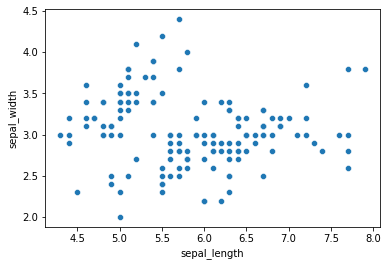

In [9]:
sns.scatterplot(data=dataSet,x='sepal_length', y='sepal_width')
plt.show()
     

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1440x1440 with 0 Axes>

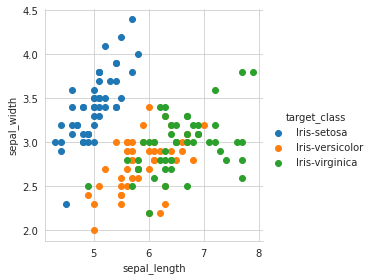

In [10]:
plt.figure(figsize=(20,20))
sns.set_style("whitegrid")
sns.FacetGrid(dataSet, hue="target_class", size=4).map(plt.scatter,'sepal_length','sepal_width').add_legend()
plt.show()

     

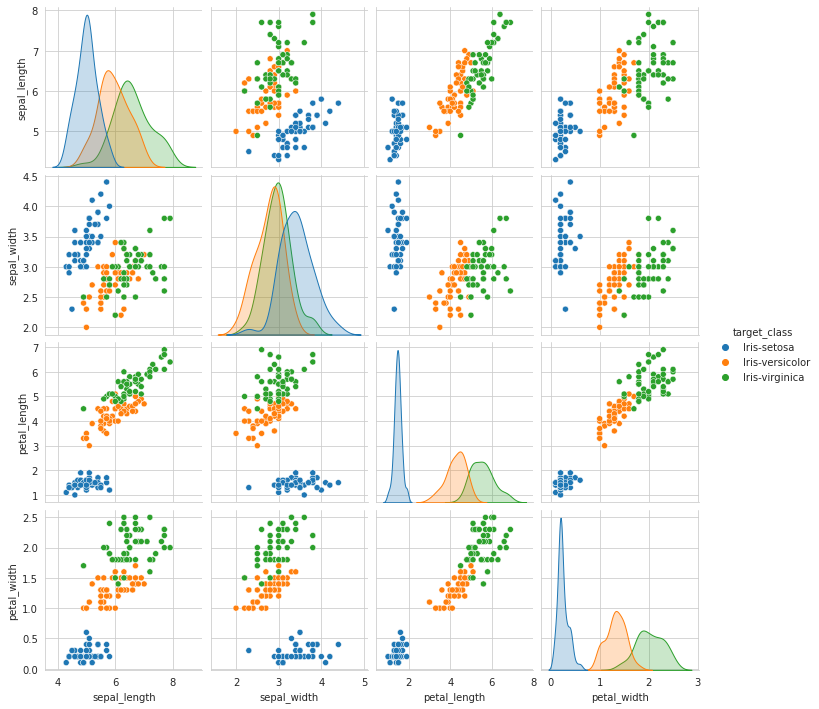

In [11]:
sns.pairplot(dataSet, hue = 'target_class')
     

In [ ]:
Correlation Between the numeric variables

In [12]:
dataSet.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

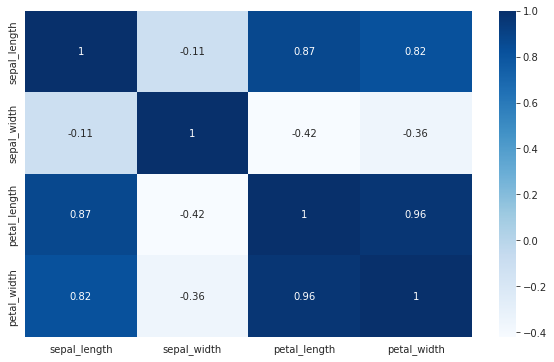

In [13]:
#Plotting the correlation using a heatmap
plt.figure(figsize = (10,6))
sns.heatmap(dataSet.corr(), cmap='Blues', annot = True)
     

In [14]:
TargetClass = {}
TargetClass["Iris-setosa"] = (dataSet["target_class"] == 'Iris-setosa').sum()
TargetClass["Iris-versicolor"] = (dataSet["target_class"] == 'Iris-versicolor').sum()
TargetClass["Iris-virginica"] = (dataSet["target_class"] == 'Iris-virginica').sum()

print(TargetClass)

{'Iris-setosa': 50, 'Iris-versicolor': 50, 'Iris-virginica': 50}


In [ ]:
Visualising the above findings using a pie chart.

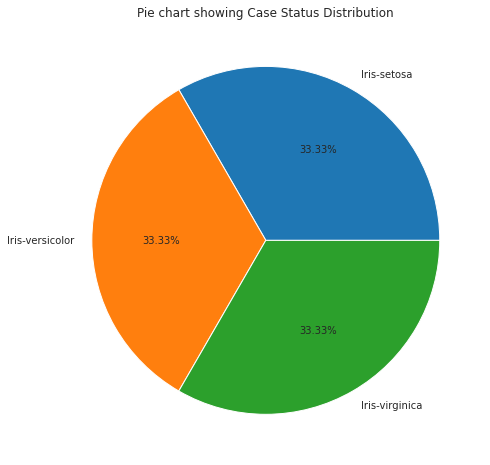

In [15]:
labels = []
count = []
for x, y in TargetClass.items():
  
    labels.append(x)
    count.append(y)
plt.figure(figsize = (8, 8))
plt.pie(count, labels=labels,autopct='%1.2f%%')
plt.title('Pie chart showing Case Status Distribution')
plt.show()

In [ ]:
Separating the features and the target class

In [17]:
X = dataSet.drop('target_class', axis = 1)
Y = dataSet['target_class']

In [18]:
X.shape

(150, 4)

In [19]:
Y.shape

(150,)

In [ ]:
Splitting the dataset

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state = 105 )
Y_train.value_counts()


Iris-setosa        42
Iris-versicolor    41
Iris-virginica     37
Name: target_class, dtype: int64

In [ ]:
Model Training and Evaluation

In [21]:
#Training the Logistic Regression Model on the training dataset
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)

In [ ]:
Model Evaluation

In [22]:
accuracy = accuracy_score(Y_test, Y_pred)
print(accuracy*100,'%')
     

96.66666666666667 %


In [ ]:
Plotting the classification matrix



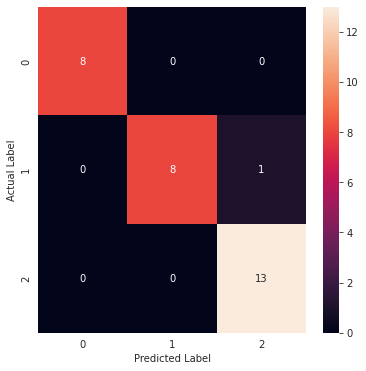

array([[ 8,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 13]])

In [23]:
plt.figure(figsize = (6, 6))
CM = confusion_matrix(Y_test, Y_pred)
sns.heatmap(CM,annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()
CM

In [24]:

print(classification_report(Y_test, Y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [ ]:
Thank You!